In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Box-Plot to detect the outliers

<Axes: >

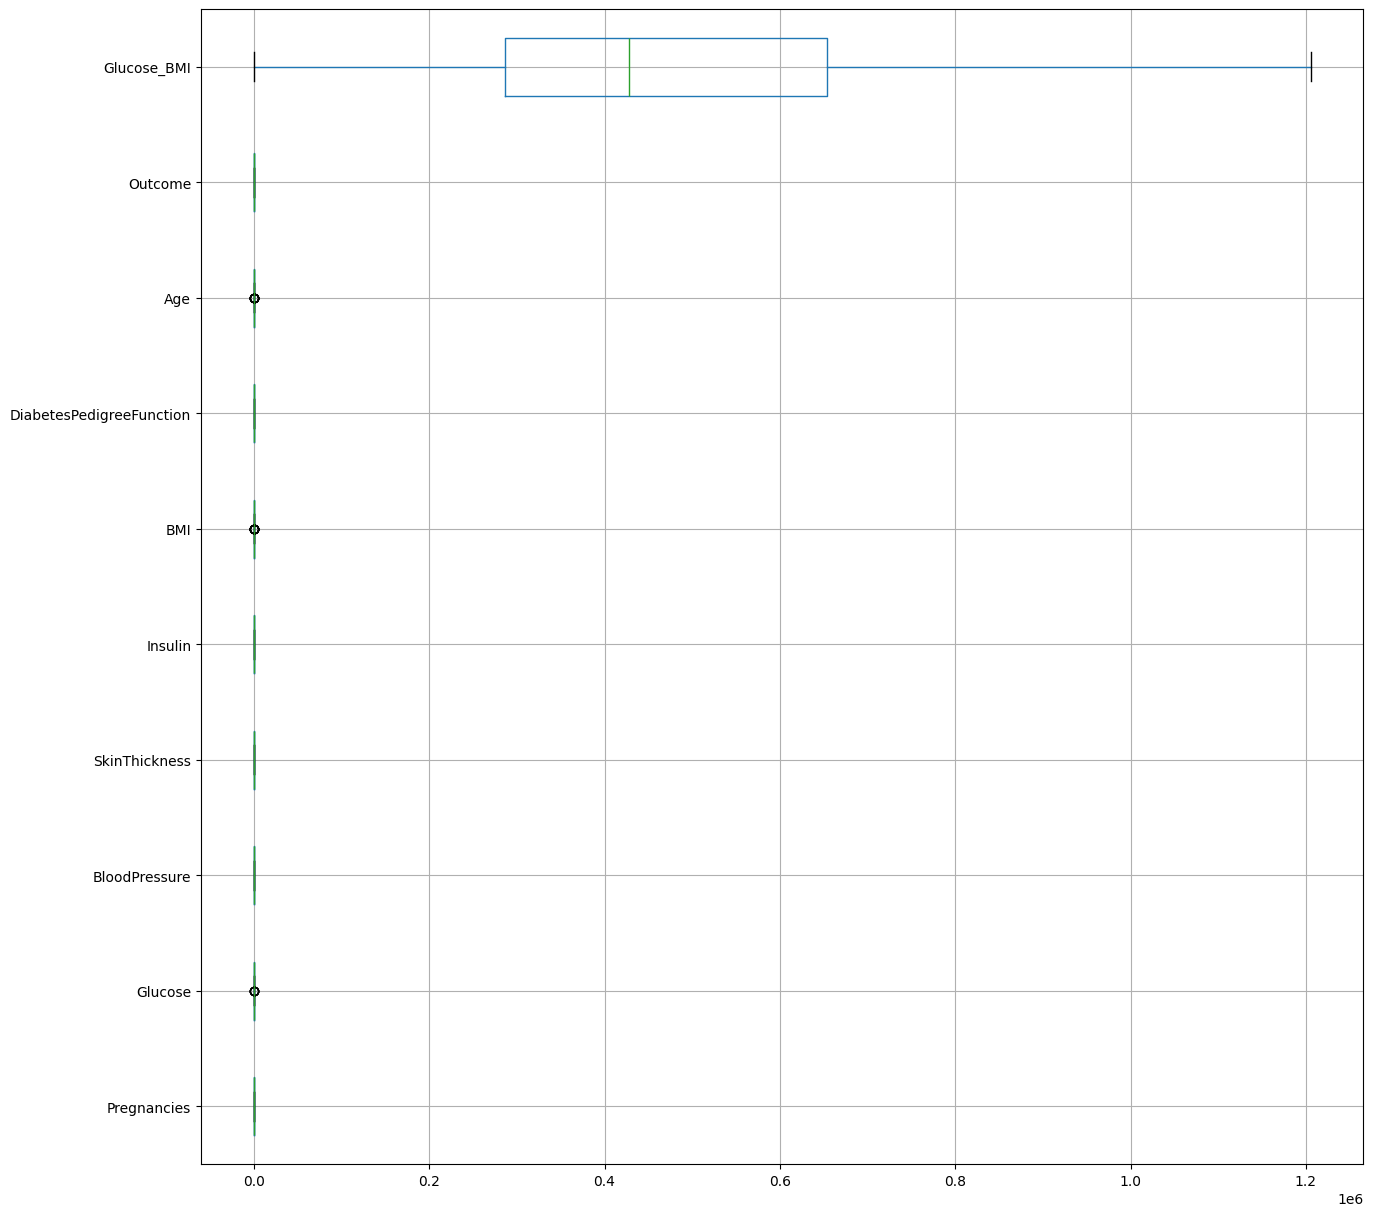

In [24]:
df.boxplot(figsize = (15,15), vert = False)

## Feature Engineering (Glucose_BMI)

### While it is not a standard medical metric, it can serve as a risk indicator for conditions like insulin resistance

In [6]:
df["Insulin"].describe()
df["Glucose_BMI"]= df["Glucose"]*df["BMI"]*df["Glucose"]

## Function for winsorization of parameters

In [7]:
def quantline_detect(x):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3 - q1
    upper_fence = int(q3 + (1.5*iqr))
    lower_fence = int(q1 - (1.5*iqr))

    df_temp = df[x]
    temp_arr = []

    for i in range(len(df_temp)):
        if df_temp[i] > upper_fence:
            df.loc[df[x] > upper_fence, x] = upper_fence
            temp_arr.append(df_temp[i])
            
        elif df_temp[i] < lower_fence:
            df.loc[df[x] < lower_fence, x] = lower_fence
            temp_arr.append(df_temp[i])

        else:
            temp_arr.append(df_temp[i])

    df[x] = temp_arr

In [8]:
quantline_detect("Pregnancies")
quantline_detect("Glucose")
quantline_detect("BloodPressure")
quantline_detect("SkinThickness")
quantline_detect("Insulin")
quantline_detect("DiabetesPedigreeFunction")
quantline_detect("Glucose_BMI")
quantline_detect("BMI")

## Getting a quick analysis of the standard metrics

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02
mean,3.834635,121.135417,70.684896,20.511719,73.647135,32.114323,0.448178,33.240885,0.348958,5.061722e+05
std,3.336808,31.189665,14.197239,15.844744,93.561555,7.048299,0.260494,11.760232,0.476951,2.998762e+05
min,0.000000,37.000000,35.000000,0.000000,0.000000,13.000000,0.078000,21.000000,0.000000,0.000000e+00
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,2.860889e+05
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,4.275844e+05
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,6.537996e+05
max,13.000000,199.000000,107.000000,80.000000,318.000000,50.000000,1.000000,81.000000,1.000000,1.205365e+06


## Correlation Analysis

In [10]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI
Pregnancies,1.000000,0.128710,0.184723,-0.085101,-0.078214,0.024504,-0.017347,0.546628,0.219811,0.106340
Glucose,0.128710,1.000000,0.197857,0.059786,0.315832,0.235533,0.112363,0.267078,0.479122,0.917235
BloodPressure,0.184723,0.197857,1.000000,0.152644,0.050084,0.283195,0.034766,0.300509,0.113301,0.259377
SkinThickness,-0.085101,0.059786,0.152644,1.000000,0.488132,0.401589,0.180056,-0.118567,0.073125,0.196700
Insulin,-0.078214,0.315832,0.050084,0.488132,1.000000,0.209872,0.197780,-0.066546,0.124714,0.345135
BMI,0.024504,0.235533,0.283195,0.401589,0.209872,1.000000,0.142902,0.040079,0.309360,0.552341
DiabetesPedigreeFunction,-0.017347,0.112363,0.034766,0.180056,0.197780,0.142902,1.000000,0.046170,0.182604,0.144039
Age,0.546628,0.267078,0.300509,-0.118567,-0.066546,0.040079,0.046170,1.000000,0.238356,0.217379
Outcome,0.219811,0.479122,0.113301,0.073125,0.124714,0.309360,0.182604,0.238356,1.000000,0.521935
Glucose_BMI,0.106340,0.917235,0.259377,0.196700,0.345135,0.552341,0.144039,0.217379,0.521935,1.000000


## Heatmap gives a significant correlation of outcome with Glucose_BMI

### Means that insulin resistance plays a vital role in the risk of Type-2 Diabities

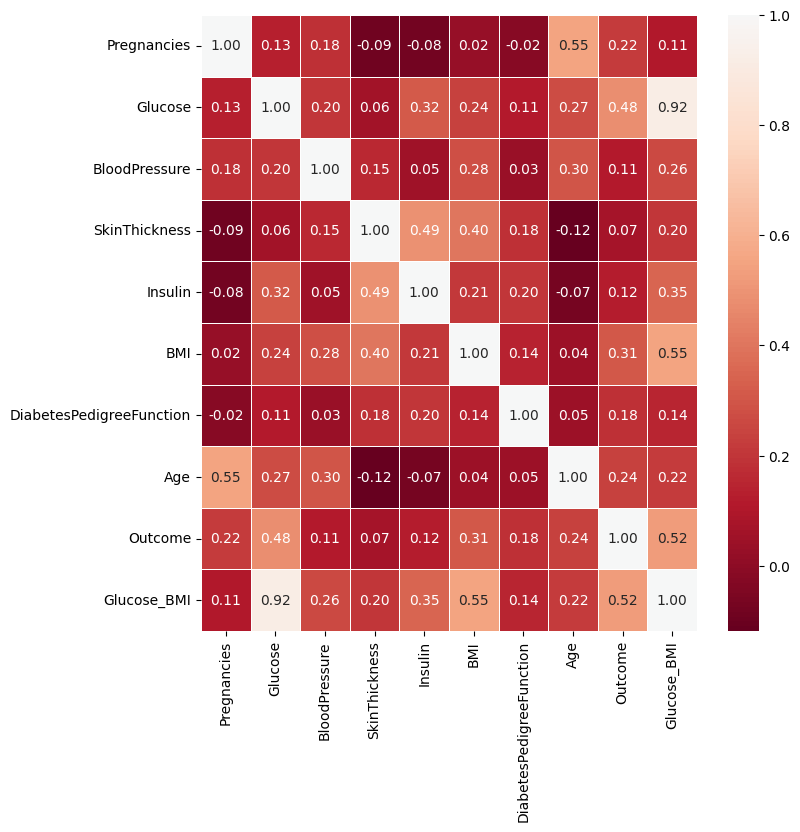

In [11]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f", linewidths=0.5, center=1)
plt.show()

## Analysing age w.r.t the outcome

### A spike in the age range of 40 - 50 years

<Axes: xlabel='Age', ylabel='Count'>

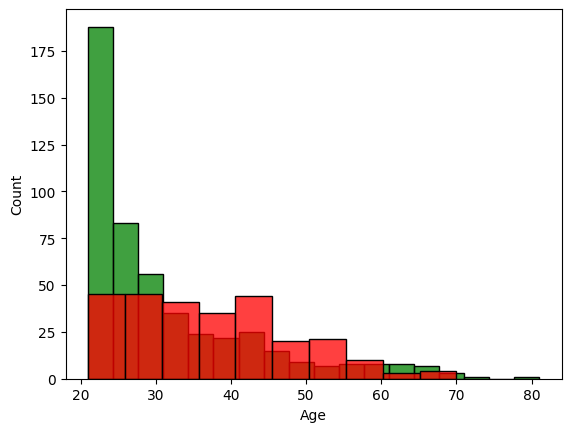

In [27]:
ax = df[df["Outcome"] == 0]["Age"]
sns.histplot(ax, color ="green")
ax = df[df["Outcome"] == 1]["Age"]
sns.histplot(ax, color ="red")

## The maximum people with diabetes are almost 5-7 year older than the healthy people

([<matplotlib.axis.XTick at 0x17ea2a89950>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80')])

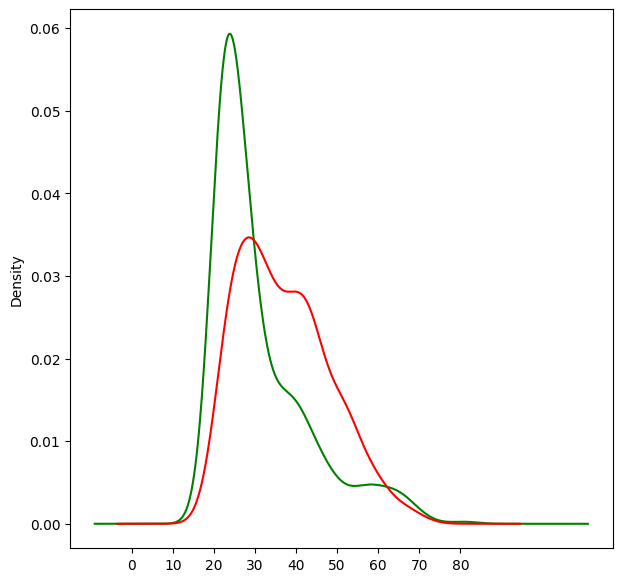

In [28]:
df[df["Outcome"]==0]["Age"].plot(kind="density", color = "green", figsize = (7,7))
df[df["Outcome"]==1]["Age"].plot(kind="density", color = "red", figsize = (7,7))
plt.xticks(range(0,90,10))

<Axes: xlabel='Age'>

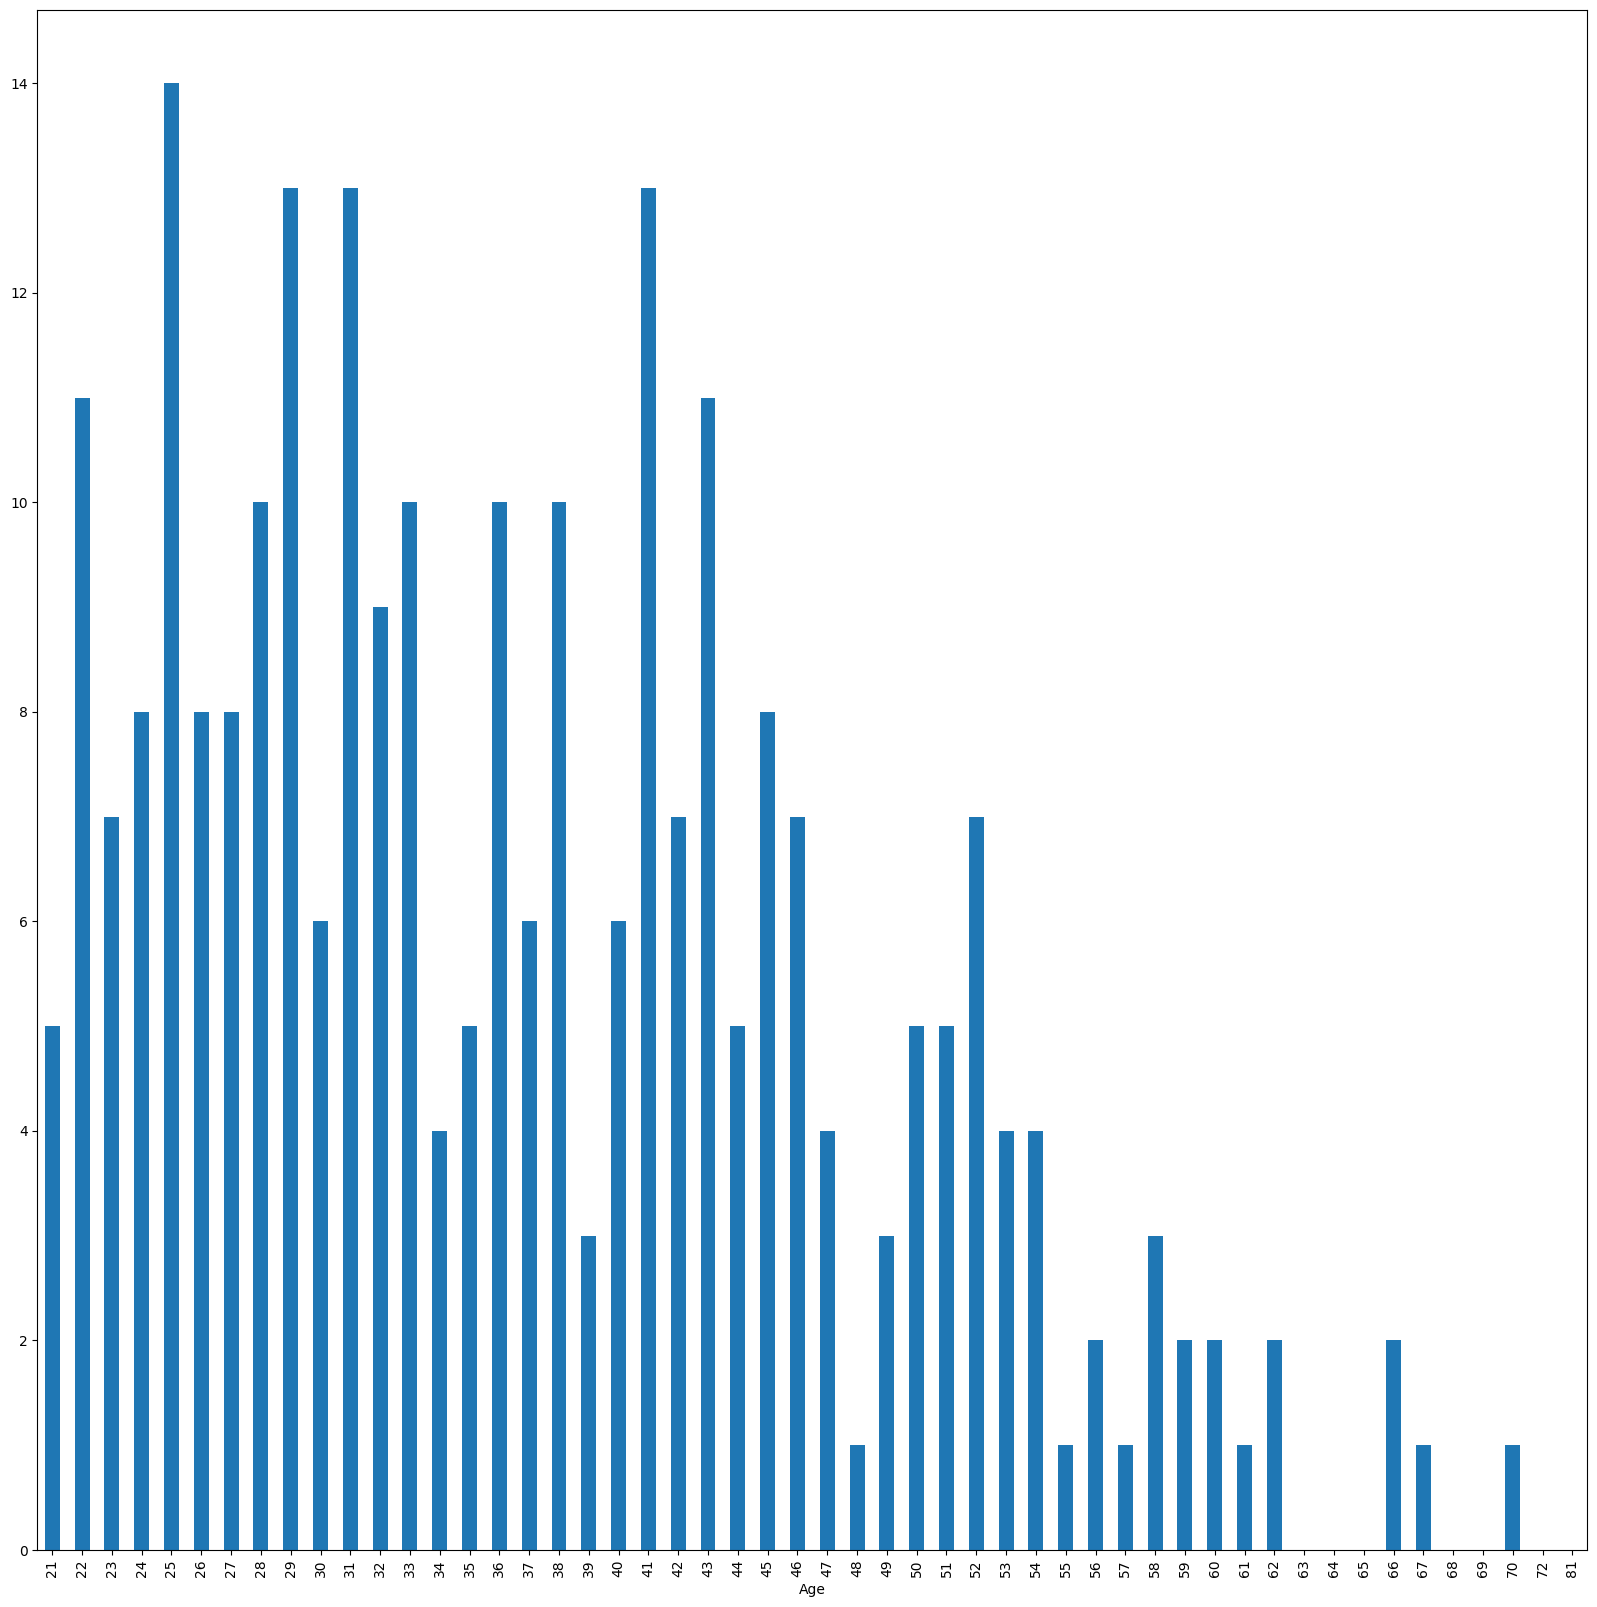

In [26]:
df.groupby("Age")["Outcome"].sum().plot(kind="bar", figsize = (20,20))

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


<Axes: xlabel='Outcome'>

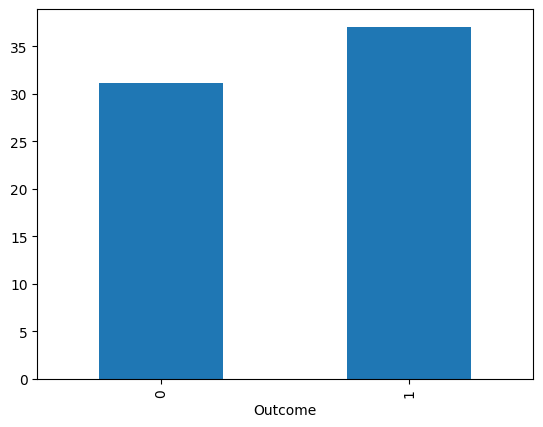

In [38]:
mean_age = df.groupby("Outcome")["Age"].mean()
print(mean_age)
df.groupby("Outcome")["Age"].mean().plot(kind = "bar")

<Axes: xlabel='Glucose', ylabel='Count'>

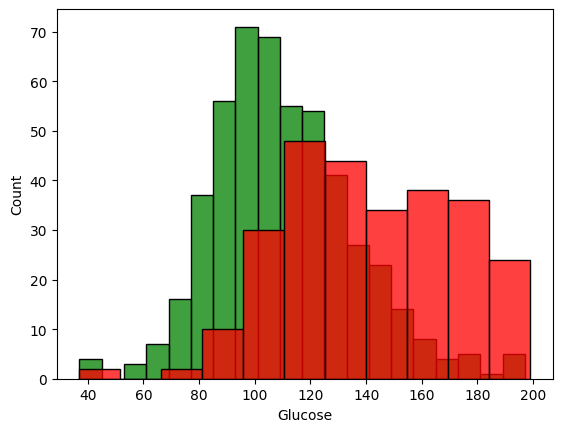

In [13]:
ax = df[df["Outcome"]==0]["Glucose"]
sns.histplot(ax,color  ="green")
ax = df[df["Outcome"]==1]["Glucose"]
sns.histplot(ax,color  ="red")

<Axes: xlabel='Insulin', ylabel='Count'>

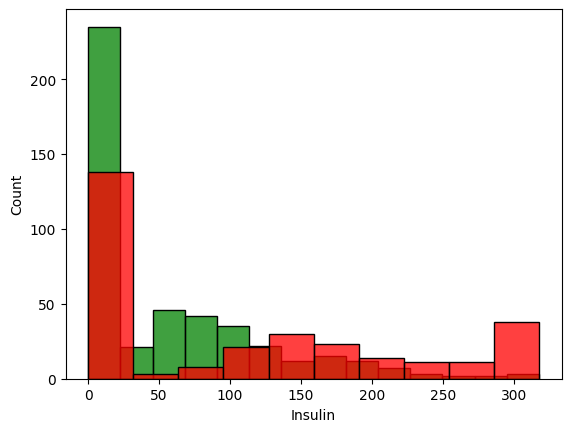

In [14]:
ax = df[df["Glucose"]<125]["Insulin"]
sns.histplot(ax, color = "green")
ax = df[df["Glucose"]>125]["Insulin"]
sns.histplot(ax, color = 'red')

<Axes: xlabel='BMI', ylabel='Count'>

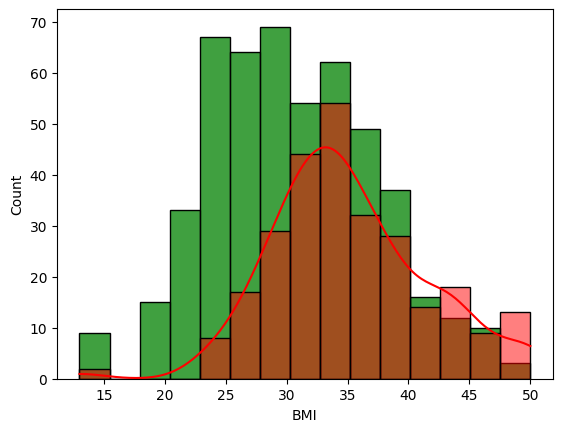

In [15]:
ax = df[df["Outcome"]==0]["BMI"]
sns.histplot(ax,color = "green")
ax = df[df["Outcome"]==1]["BMI"]
sns.histplot(ax,color = "red",kde = True)

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI
0,6,148,72,35,0,33.6,0.627,50,1,735974.4
1,1,85,66,29,0,26.6,0.351,31,0,192185.0
2,8,183,64,0,0,23.3,0.672,32,1,780293.7
3,1,89,66,23,94,28.1,0.167,21,0,222580.1
4,0,137,40,35,168,43.1,1.000,33,1,808943.9


Text(0.5, 1.0, 'Pregnancies vs Diabitics')

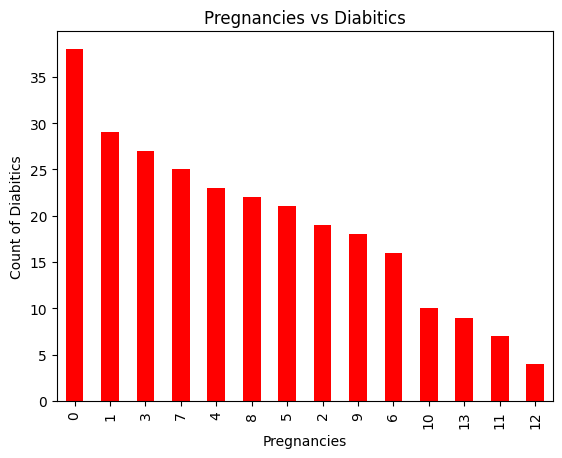

In [39]:
ax = df[df["Outcome"]==1]["Pregnancies"].value_counts().plot(kind="bar", color="red")
ax.set_ylabel("Count of Diabitics")
plt.title("Pregnancies vs Diabitics")

<Axes: xlabel='Age'>

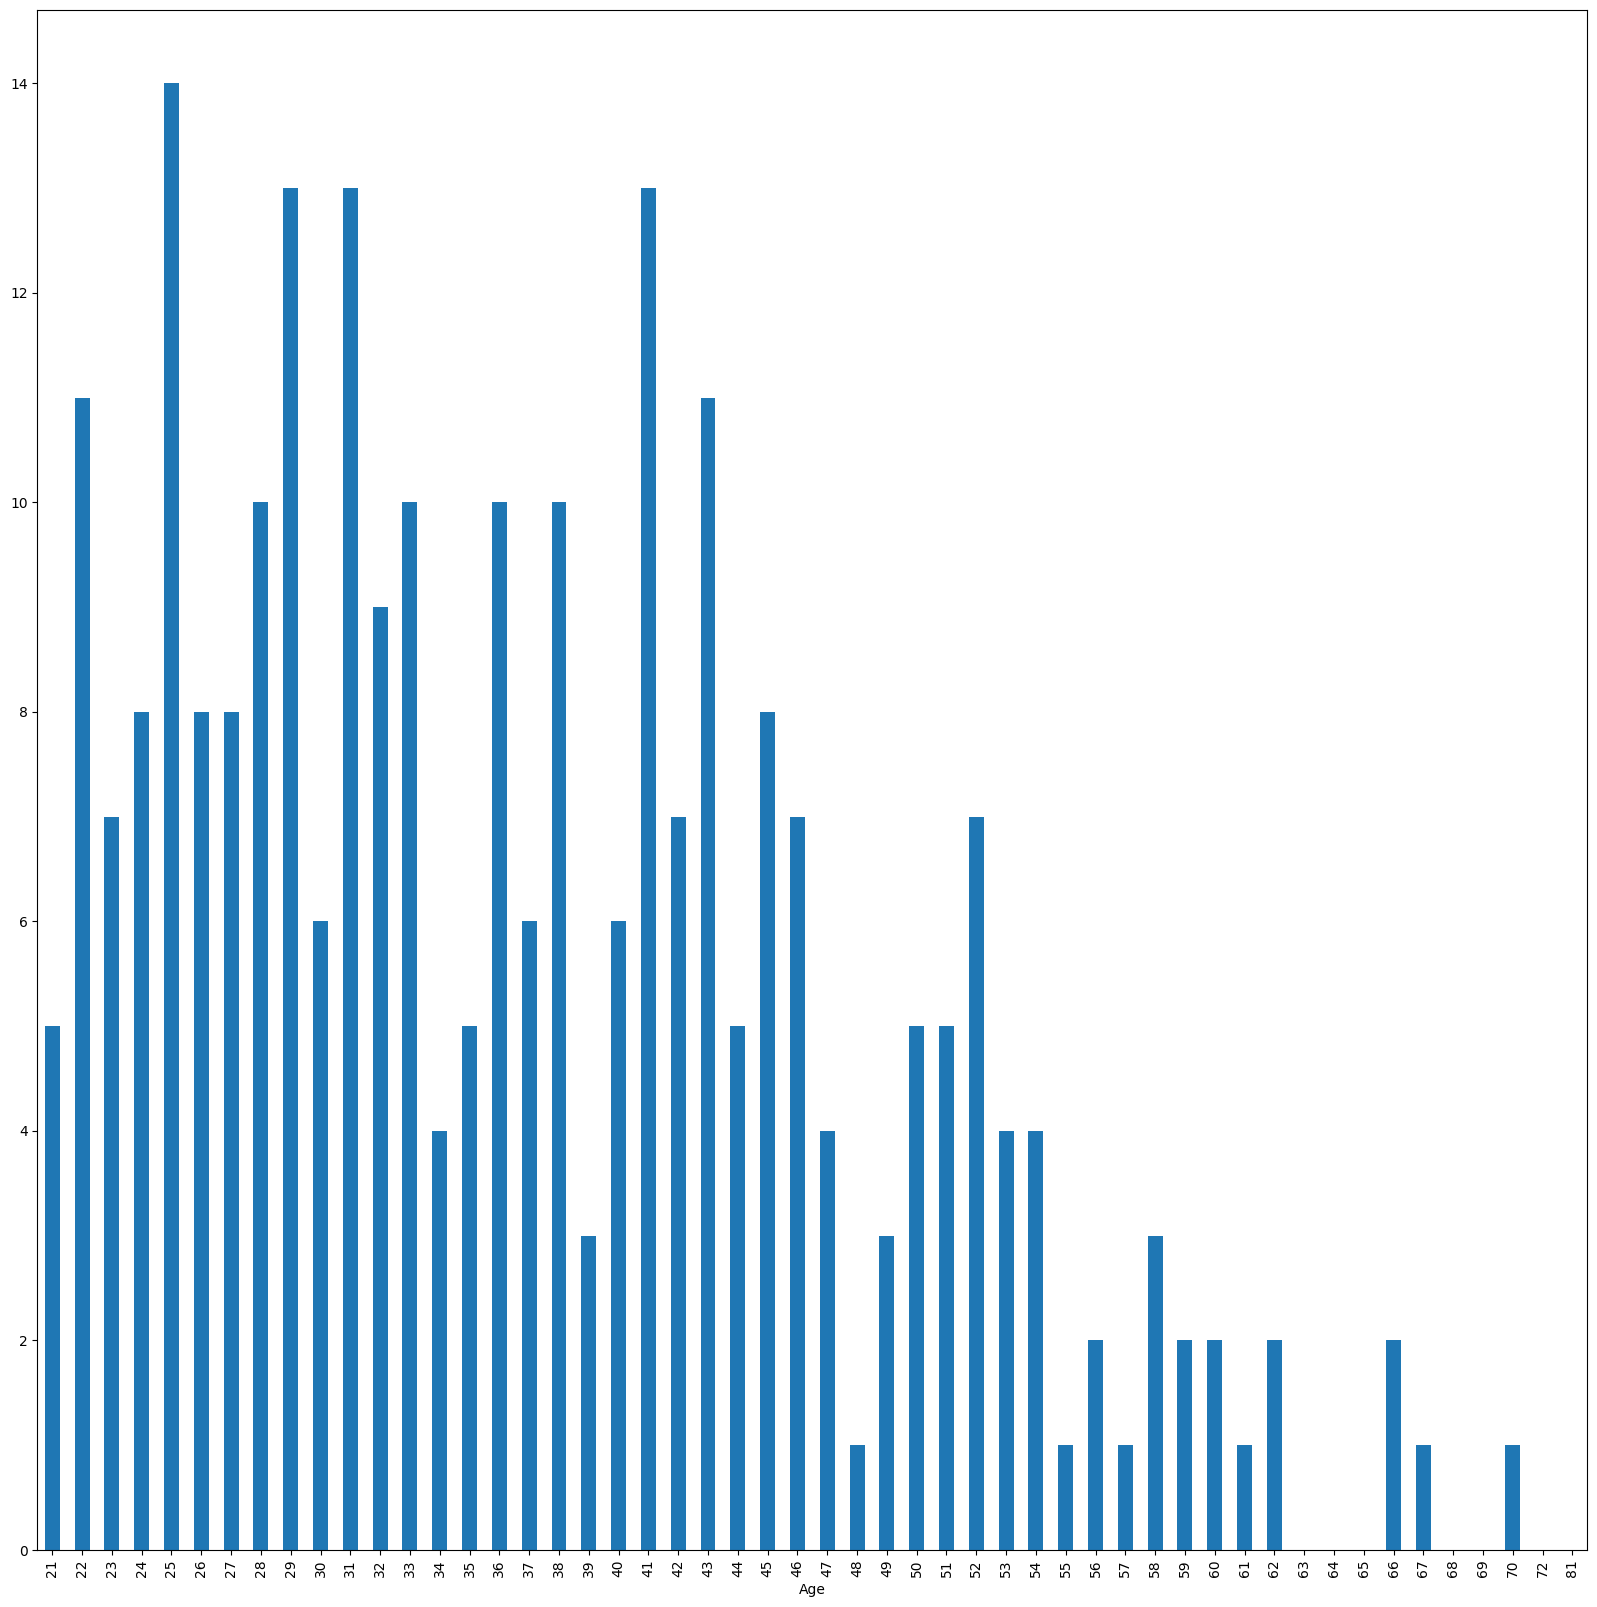

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI
0,6,148,72,35,0,33.6,0.627,50,1,735974.4
1,1,85,66,29,0,26.6,0.351,31,0,192185.0
2,8,183,64,0,0,23.3,0.672,32,1,780293.7
3,1,89,66,23,94,28.1,0.167,21,0,222580.1
4,0,137,40,35,168,43.1,1.000,33,1,808943.9


count    268.000000
mean      35.090672
std        6.412466
min       13.000000
25%       30.800000
50%       34.250000
75%       38.775000
max       50.000000
Name: BMI, dtype: float64


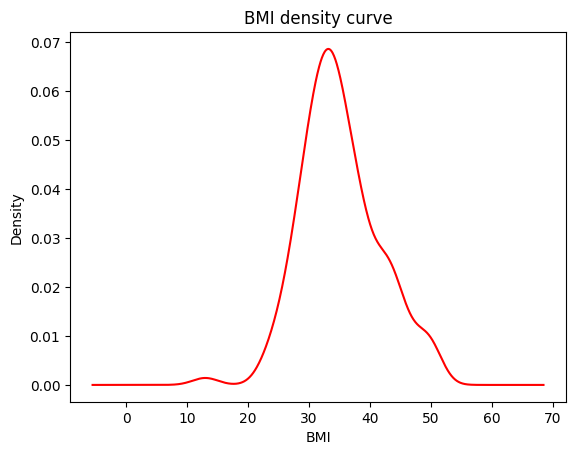

In [47]:
outcome_BMI = df[df["Outcome"]==1]["BMI"]
outcome_BMI_stats = df[df["Outcome"]==1]["BMI"].describe() 
outcome_BMI_plot = df[df["Outcome"]==1]["BMI"].plot(kind = "density", color = "red")
plt.title("BMI density curve")
outcome_BMI_plot.set_xlabel("BMI")

print(outcome_BMI_stats)

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


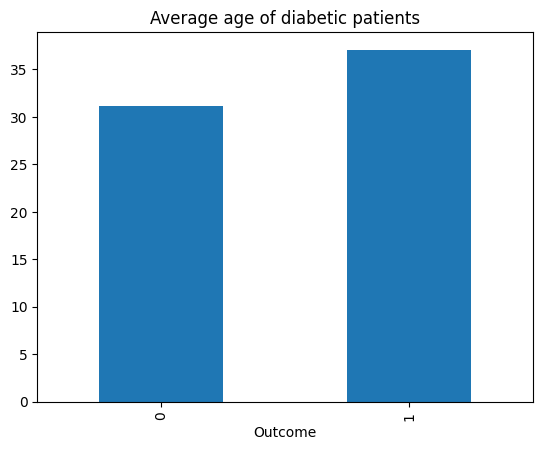

In [48]:
mean_age = df.groupby("Outcome")["Age"].mean()
df.groupby("Outcome")["Age"].mean().plot(kind = "bar")
plt.title("Average age of diabetic patients")
print(mean_age)

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI
0,6,148,72,35,0,33.6,0.627,50,1,735974.4
1,1,85,66,29,0,26.6,0.351,31,0,192185.0
2,8,183,64,0,0,23.3,0.672,32,1,780293.7
3,1,89,66,23,94,28.1,0.167,21,0,222580.1
4,0,137,40,35,168,43.1,1.000,33,1,808943.9
